# Solution of assignment "Multiple Scattering"
This is the coded solution.

### Part two: Coulomb & large-angle hard scattering 
We simulate two processes:

 * low-angle multiple scattering: occuring most of the time
 * large-angle hard scatters (HS): rare event
 
The low-angle multiple scattering: angles follow a uniform distrinution, centered at zero and spread $p_1 = | \pm \theta_\text{max}$. 

The scattered angles from the hard scattering are distributed according to a double-triangular distribution. This distribution is centered at zero and of side: $p_2 = | \pm 2\theta_\text{max, hard scatter}|$. The large-angle scattering is a rare process, at a fraction $p_3$. We assume it occurs less than 3\% of the time but we do not know this precisely.


| Parameter                                 | Naming    | Value | Unit    |
|-------------------------------------------|-----------|-------|---------|
| $|\pm \theta_\text{max}|$                 | $p_1$     | ---   | degree  |
| $|\pm 2 \theta_\text{max, hard scatter}|$ | $p_2$     | ---   | degree  |
| Frequency of hard scattering              | $p_3$     | 0.063 | percent |
 
Let's generate the data.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

%reload_ext autoreload
import toyTracker as tk
import DoubleTriangularGenerator as DTG

#==================================================================
# GENERATING THE DATA 
finalDevsCS = [] 
finalDevsHS = []
# For checks & info:
finalDevs   = [] # should be the sum of the two
thetaCSvals = []   # storing the angles Coulomb Scattering
thetaHSvals = []   # storing the angles Coulomb Scattering

N_tracks    = 5000
#==================================================================
# THE PARAMETERS:
p1 = 2.95
p2 = 29
p3 = 0.027
#==================================================================
# Config of toy tracker:
minx      = -2.
maxx      = +2.
N_layers  =  12

# Plotting tools
blues    = ['navy', 'blue', 'royalblue', 'deepskyblue', 'skyblue']
greens   = ['green', 'forestgreen', 'limegreen','yellowgreen','palegreen']
histoConf = dict(histtype='stepfilled', alpha=0.75 , ec="k")
plt.rcParams['font.size'] = 18
#==================================================================
#
fig, ax   = tk.buildDetector(N_layers, minx, maxx)
nBins     = 200

#==================================================================
# Function to get the deflection:
def getDeflectionWithAngle(angleInDegrees, distanceLayers=1):

    deflection = np.tan(np.deg2rad(angleInDegrees)) * distanceLayers

    return deflection

#==================================================================


# Loop over tracks:
for t in range(N_tracks):
    
    trackXvals  = []   # storing the current track X coordinates
    trackYvals  = []   # storing the current track Y corrdinates

    
    # source of particle hits first layer at detector origin with incident angle 0
    x0      = 0
    y0      = 0

    trackXvals.append(x0)
    trackYvals.append(y0)
    
    isHS = False # by default tracks are small-angle scattering
    
    for l in range(N_layers):

        # Get track coordinate at current layer l
        x_layer = trackXvals[-1]
        y_layer = trackYvals[-1]

        #------------------------------------
        # Hard scattering process
        #------------------------------------
        # let's get a random number from 0 and 1 and see if it falls below p3:
        if random.uniform(0,1) < p3:
            # Hard scattering:
            new_angle = DTG.getPRandomDoubleTriangular(p2)
            isHS = True
            thetaHSvals.append(new_angle)

        #------------------------------------
        # Coulomb multiple scattering
        #------------------------------------
        else: # Coulomb
            new_angle = 2 * p1 * random.uniform(0 , 1) - p1
            thetaCSvals.append(new_angle)
        
        #------------------------------------
        
        # Compute the horizontal deviation (deltaX) on next layer: 
        deviation = getDeflectionWithAngle(new_angle)

        # Store coordinates on next layer
        y_next = y_layer + 1
        x_next = x_layer + deviation
        trackYvals.append( y_next )
        trackXvals.append( x_next )

        # If on the last layer, store the final deviation (for histogramming later)
        if l == N_layers - 1:
            if isHS:
                finalDevsHS.append( x_next)
            else:
                finalDevsCS.append( x_next)
            finalDevs.append( x_next )
    
    #----------------------------------------------
    # Done with track, let's plot it!
    #----------------------------------------------
    if isHS: # green!
        ax[0].plot( trackXvals, trackYvals, color=greens[t%len(greens)])
    else:
        ax[0].plot( trackXvals, trackYvals, color=blues[t%len(blues)])

    # Print info:
    if(t%100==0):
        print("   Track i = % 4d\tFinal angle = %.1f\tDefletion = %.3f\tHS? %r" %(t, new_angle, x_next, isHS))

# Plot distributions on deflection plot:
# Total = black dots
n, binArray, patches = ax[1].hist([finalDevsHS,finalDevsCS], nBins, range=[minx, maxx], stacked=True, color=['limegreen','deepskyblue'],**histoConf) 

# Check with total distribution
histFinalDevs, binVals  = np.histogram(finalDevs, nBins, range=[minx, maxx])
ax[1].plot(binVals[:-1], histFinalDevs, '.', c='gray')
    
fig.tight_layout()
fig.canvas.draw()
fig.savefig("tracker_AllScatt_%d_tracks.png"%N_tracks)


   Track i =    0	Final angle = 2.3	Defletion = 0.084	HS? True
   Track i =  100	Final angle = -2.0	Defletion = -0.008	HS? False
   Track i =  200	Final angle = 2.6	Defletion = 0.092	HS? False
   Track i =  300	Final angle = 1.0	Defletion = 0.033	HS? False
   Track i =  400	Final angle = 0.7	Defletion = -0.013	HS? False
   Track i =  500	Final angle = -1.8	Defletion = -0.044	HS? False
   Track i =  600	Final angle = 2.8	Defletion = -0.077	HS? False
   Track i =  700	Final angle = 1.7	Defletion = 0.104	HS? False
   Track i =  800	Final angle = 1.0	Defletion = 0.119	HS? False
   Track i =  900	Final angle = -1.3	Defletion = -0.105	HS? False
   Track i =  1000	Final angle = 1.2	Defletion = 0.171	HS? True
   Track i =  1100	Final angle = -1.8	Defletion = -0.080	HS? False
   Track i =  1200	Final angle = 1.9	Defletion = -0.246	HS? True
   Track i =  1300	Final angle = 0.4	Defletion = -0.242	HS? True
   Track i =  1400	Final angle = 0.0	Defletion = -0.067	HS? False
   Track i =  1500	Final a

Let's save this in a text file.

In [16]:
for i in range(len(finalDevs)):
    print("track%05d\t%.5f"%(i, finalDevs[i]))
    

track00000	0.00660
track00001	-0.31317
track00002	-0.21214
track00003	0.05390
track00004	-0.23030
track00005	-0.04302
track00006	0.02739
track00007	-0.13268
track00008	0.02591
track00009	0.29308
track00010	0.05351
track00011	-0.17560
track00012	0.17037
track00013	0.42592
track00014	0.20726
track00015	0.19609
track00016	0.17434
track00017	0.02770
track00018	0.18376
track00019	-0.08221
track00020	-0.06138
track00021	0.03049
track00022	-0.12309
track00023	-0.09761
track00024	0.09284
track00025	-0.07852
track00026	-0.05537
track00027	-0.03707
track00028	0.02241
track00029	0.23429
track00030	0.05607
track00031	0.18321
track00032	0.12471
track00033	0.30127
track00034	-0.08069
track00035	-0.05093
track00036	-0.39080
track00037	0.14619
track00038	-0.07877
track00039	0.10545
track00040	-0.51292
track00041	-0.46688
track00042	-0.14783
track00043	0.07995
track00044	-0.07826
track00045	-0.12125
track00046	-0.06236
track00047	0.01558
track00048	0.09467
track00049	0.15432
track00050	0.09773
track000

track01746	0.19561
track01747	0.01490
track01748	0.24715
track01749	0.02229
track01750	-0.13334
track01751	-0.30429
track01752	0.12448
track01753	0.05665
track01754	-0.01202
track01755	-0.03418
track01756	0.02241
track01757	0.07796
track01758	0.14231
track01759	-0.03861
track01760	-0.09059
track01761	-0.18280
track01762	0.44673
track01763	0.04839
track01764	0.09832
track01765	-0.22284
track01766	-0.18558
track01767	-0.77681
track01768	-0.01953
track01769	0.13204
track01770	-0.01544
track01771	0.02458
track01772	0.06222
track01773	-0.18262
track01774	0.00126
track01775	-0.05673
track01776	0.09291
track01777	0.10761
track01778	0.06556
track01779	0.07381
track01780	-0.12299
track01781	-0.09593
track01782	0.32897
track01783	-0.03608
track01784	-0.12097
track01785	0.06171
track01786	-0.01686
track01787	0.00389
track01788	0.11604
track01789	0.07700
track01790	0.07633
track01791	-0.22729
track01792	0.21171
track01793	-0.31819
track01794	-0.13106
track01795	-0.00001
track01796	-0.09445
track01

track04245	-0.01910
track04246	0.37852
track04247	-0.23275
track04248	0.19221
track04249	0.09529
track04250	-0.10792
track04251	-0.15135
track04252	-0.04618
track04253	-0.01307
track04254	0.14583
track04255	0.37957
track04256	-0.48201
track04257	0.08572
track04258	0.04480
track04259	-0.03823
track04260	0.08540
track04261	-0.22671
track04262	-1.00455
track04263	-0.07869
track04264	-0.00840
track04265	-0.10216
track04266	0.25017
track04267	0.05688
track04268	-0.08030
track04269	-0.12517
track04270	0.19991
track04271	0.05460
track04272	0.13398
track04273	-0.09064
track04274	0.23669
track04275	0.05255
track04276	0.01695
track04277	0.20244
track04278	-0.59591
track04279	0.00190
track04280	0.02596
track04281	0.00517
track04282	0.07988
track04283	0.09769
track04284	-0.12500
track04285	0.17358
track04286	-0.06264
track04287	-0.41854
track04288	-0.04663
track04289	0.03538
track04290	0.02540
track04291	-0.10513
track04292	-0.05781
track04293	0.12954
track04294	0.03175
track04295	-0.22750
track04

Let's check if the Coulomb and hard scattering angles are distributed uniformly and according to a double triangle distribution, respectively.


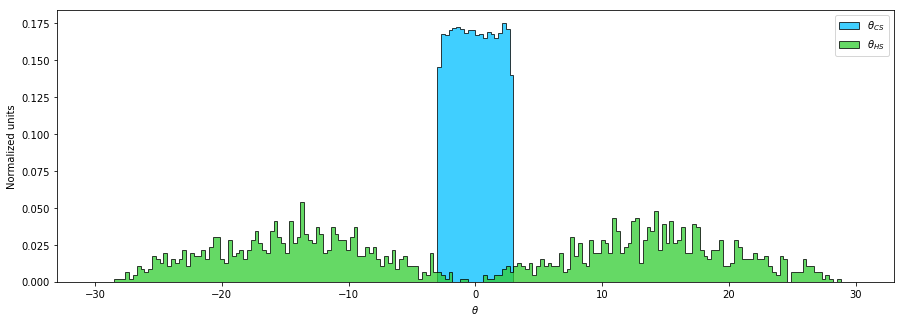

In [3]:
fig2 = plt.figure(figsize=(15,5))
histoThetaCS, binArrayD, patchesD = plt.hist(thetaCSvals, 200, range=[-30., 30], label=r'$\theta_{CS}$', density=True, color='deepskyblue', **histoConf)
histoThetaHS, binArrayD, patchesD = plt.hist(thetaHSvals, 200, range=[-30., 30], label=r'$\theta_{HS}$', density=True, color='limegreen', **histoConf)
plt.xlabel(r'$\theta$')
plt.ylabel('Normalized units')
plt.legend()
fig2.show()
fig2.savefig("tracker_AllScatt_%d_tracks_thetas.png"%N_tracks)


Looks right!
Now let's try several values of $p_1, p_2, p_3$ to reproduce the observations.

First step: as the hard scattering events are rare, I will first step $p_3$ to zero and focus on getting a good estimate for $p_1$. For this I use a more elaborate version of my Tracker Simulator: Tracker Simulator II (it's coming back!) Have a look at the methods there.

In [5]:
%reload_ext autoreload
import toyTracker as tk
import TrackerSimulator2 as tkSim2

theta_max_guess = 5
nBins2 = 50

# Parameter 2 is dummy: will have no influence because p3 is zero: we will never have any hard scatter
predDevs, predDevsCS, predDevsHC = tkSim2.getDeflectionsAllTracks( N_layers, N_tracks, theta_max_guess , 1, 0)

fig2 = plt.figure(figsize=(15,5))
plt.title('Deflection distribution')
plt.xlabel('Deflections on last layer')
plt.ylabel('Number of tracks')
# Overlaying data (D) and guessed (G) distribution
nObs,  binArrayObs,  patchesObs  = plt.hist(finalDevs,nBins2, range=[minx, maxx],**histoConf)
nPred, binArrayPred, patchesPred = plt.hist(predDevs, nBins2, range=[minx, maxx], color='red', histtype='step', lw=2)
fig2.show()

NameError: name 'finalDevsCS' is not defined